As a user, I want to know overall reating so that I can undertand current FIFA progress

###### Gladies FIFA study: FIFA participants 

Start to do plots and analyze data

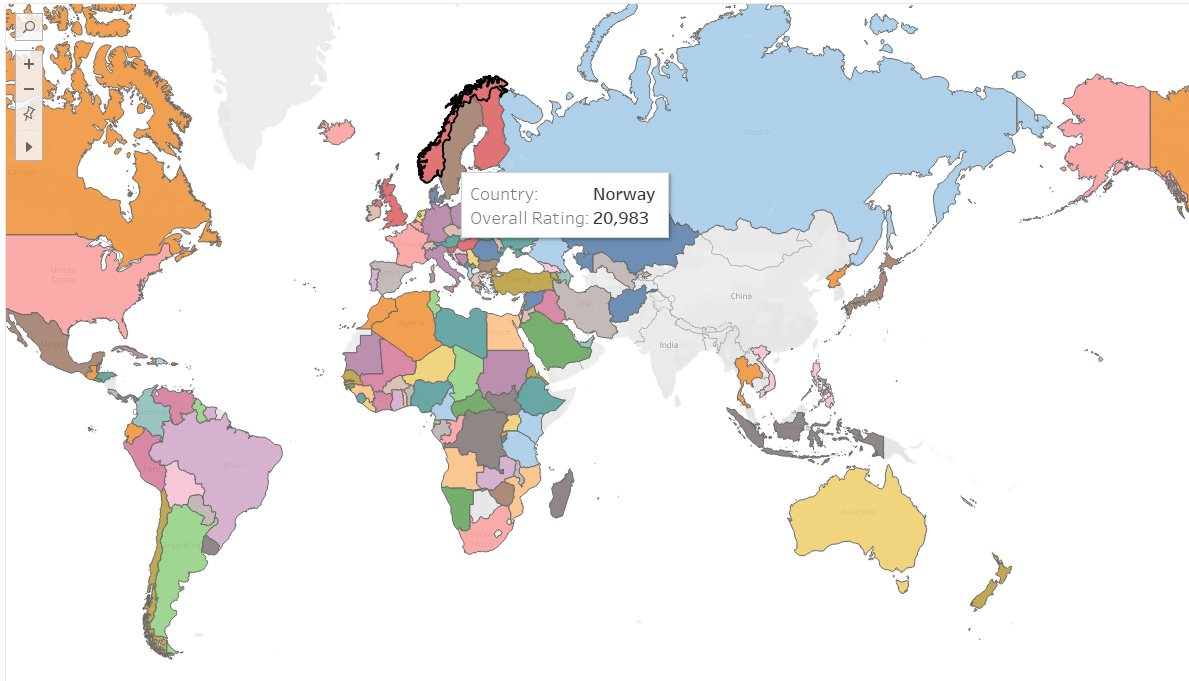

In [7]:
from IPython.display import Image 
Image(filename='playerFrom.png')

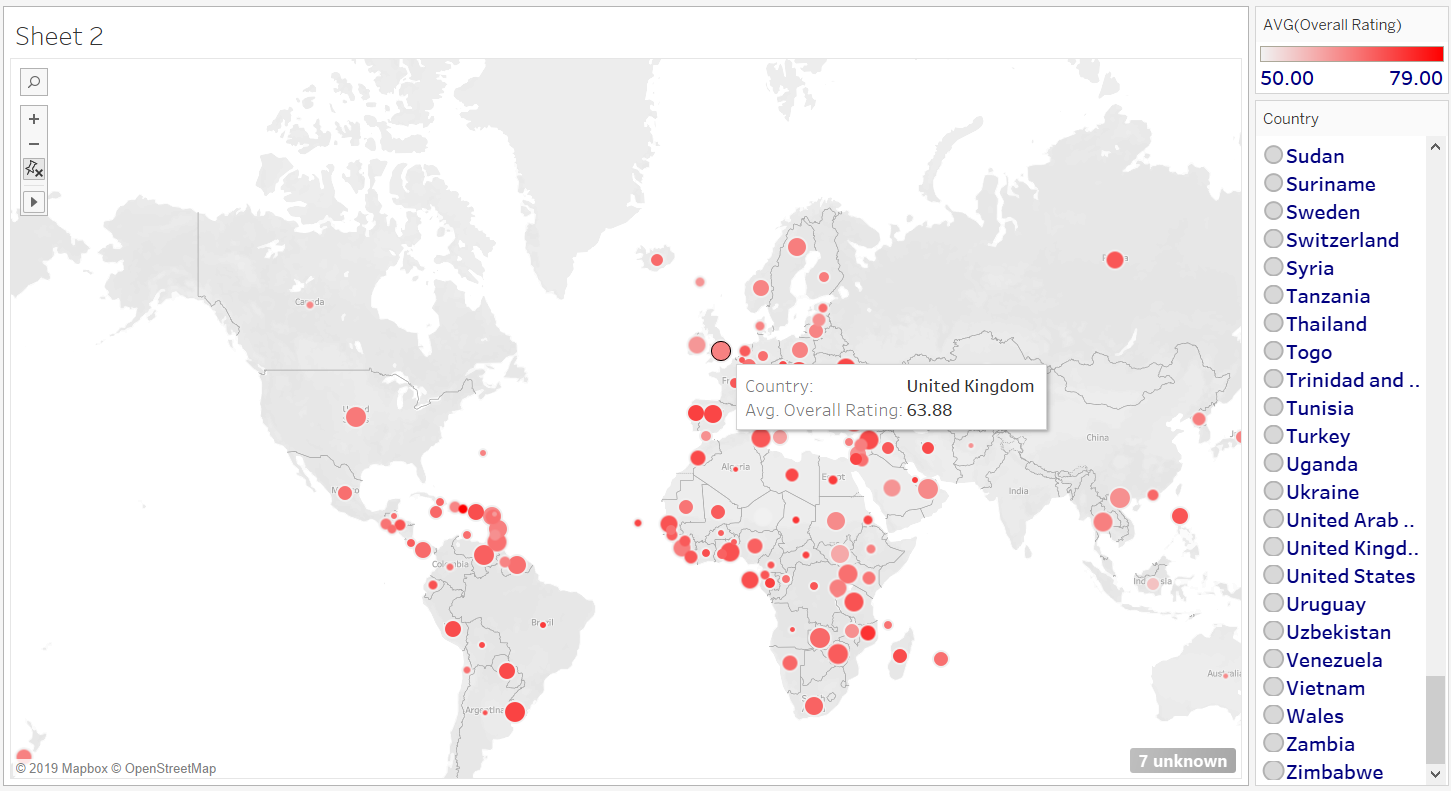

In [8]:
from IPython.display import Image 
Image(filename='countryMap_overallRating.png')

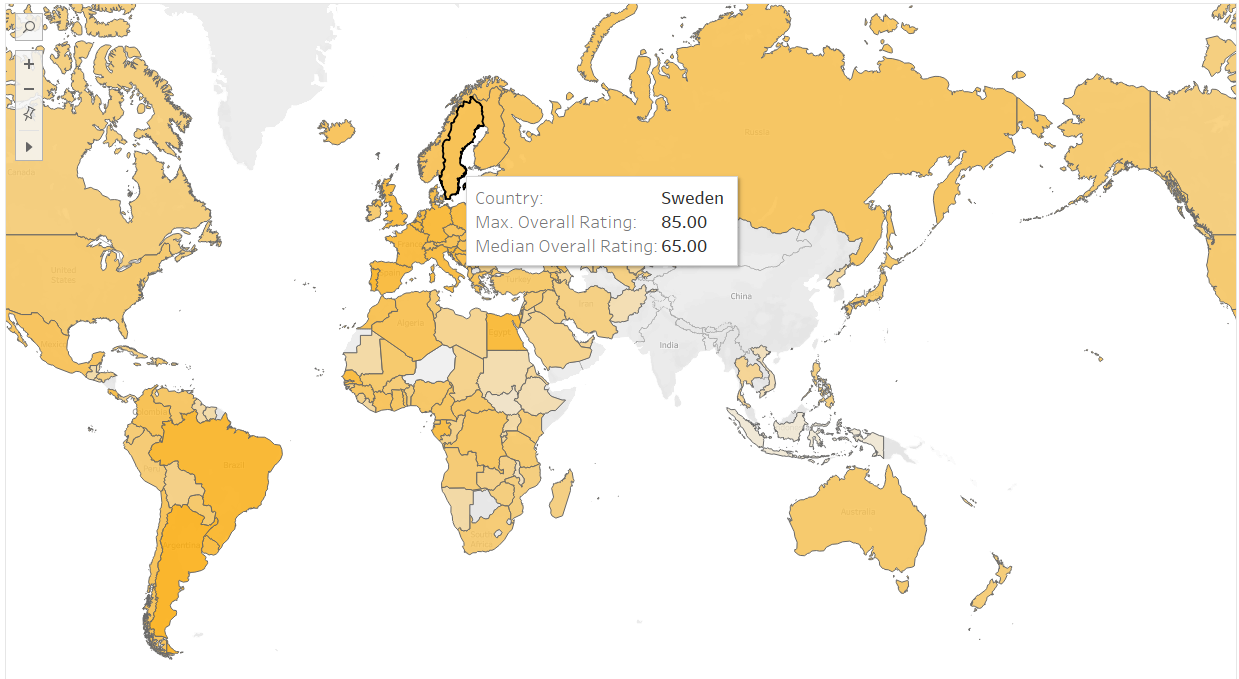

In [9]:
from IPython.display import Image 
Image(filename='overallRating_g.png')

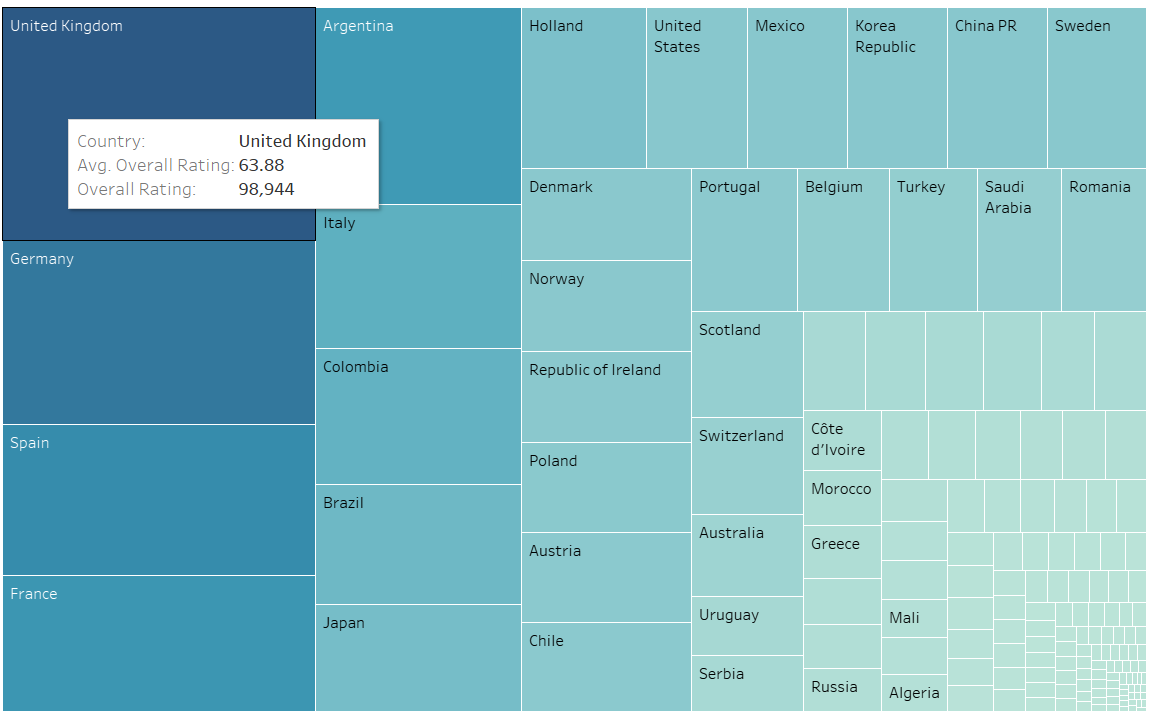

In [3]:
from IPython.display import Image 
Image(filename='Heatmap.png')

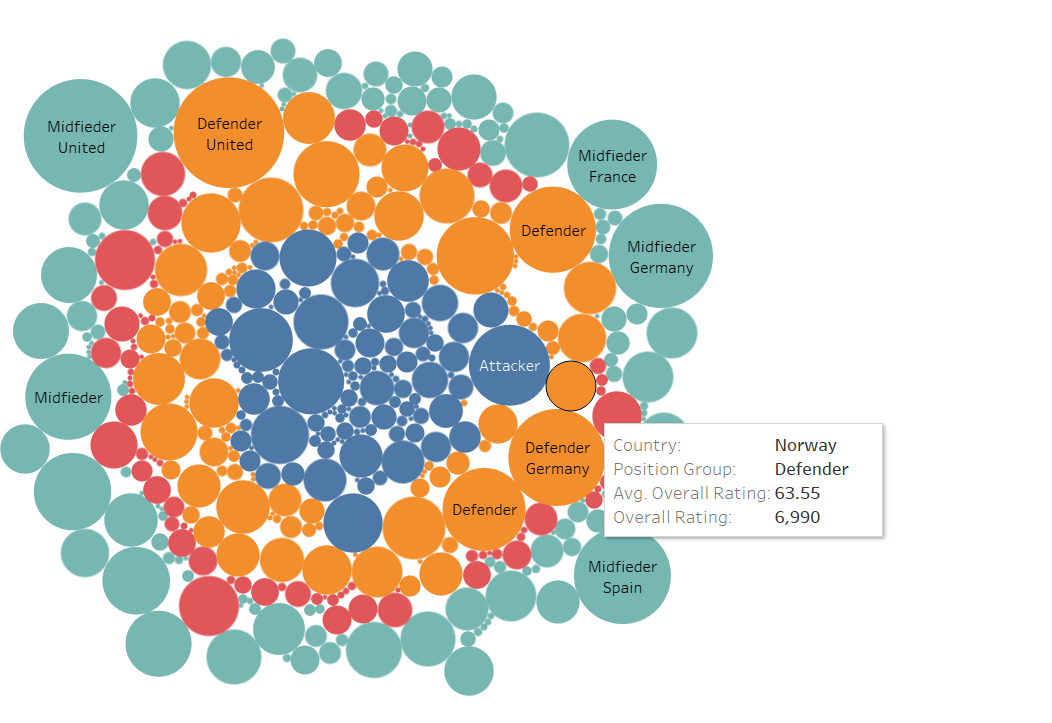

In [4]:
from IPython.display import Image 
Image(filename='PositionGroup_country.png')

In [3]:
import pandas as pd
sample=pd.read_csv('FIFA_1112.csv')
df=sample

In [4]:
#convert country names which are recongized by python
df['Country'] = pd.np.where(df['Country'] == "Holland", "Netherlands", df['Country'])
df['Country'] = pd.np.where(df['Country'] == "England", "United Kingdom", df['Country'])

In [5]:
#import modules for convert contry name to contry codes
import folium
import pycountry
df['Countryfullname'] = df['Country']
df['Countryfullname_cont'] = df['Country']
countries= df['Country'].unique().tolist()

In [6]:
#convert country to country code to three digits
import pycountry

input_countries = df['Country']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]

In [7]:
#convert country to country code to two digits then continent
import pycountry
import pycountry_convert as pc
input_countries = df['Countryfullname_cont']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

codes_cont = [countries.get(country, 'Unknown code') for country in input_countries]

In [8]:
df['Country'] = codes
df.head()

Unnamed: 0               Name                 Club Country Continent  \
0           0       Lionel Messi         FC Barcelona     ARG        SA   
1           1  Cristiano Ronaldo      Piemonte Calcio     PRT        EU   
2           2          Neymar Jr  Paris Saint-Germain     BRA        SA   
3           3    Kevin De Bruyne      Manchester City     BEL        EU   
4           4        Eden Hazard          Real Madrid     BEL        EU   

              League  Overall Rating Position Position Group  Skill  ...  \
0   LaLiga Santander              94       RW       Attacker      4  ...   
1        Serie A TIM              93       ST       Attacker      5  ...   
2  Ligue 1 Conforama              92       LW       Attacker      5  ...   
3     Premier League              91      CAM      Midfieder      4  ...   
4   LaLiga Santander              91       LW       Attacker      4  ...   

   Shooting Passing  Dribbling  Defending  Physicality  Height  Base Stats  \
0        92      92         96         39           66     170         472   
1        93      82         89         35           78     187         467   
2        85      87         95         32           58     175         448   
3        86      92         87         61           78     181         480   
4        83      86         94         35           66     175         455   

   In Game Stats  Countryfullname  Countryfullname_cont  
0           2297        Argentina             Argentina  
1           2265         Portugal              Portugal  
2           2197           Brazil                Brazil  
3           2311          Belgium               Belgium  
4           2191          Belgium               Belgium  

[5 rows x 23 columns]

In [11]:
import chart_studio as py
import pandas as pd
import plotly.graph_objs as go


data = [go.Choropleth(
    locations = df['Country'],
    z = df['Overall Rating'],
    text = df['Countryfullname'],
    colorscale = [
        [0, "rgb(220, 220, 220)"],
        [0.35, "rgb(106, 137, 247)"],
        [0.5, "rgb(70, 100, 245)"],
        [0.6, "rgb(90, 120, 245)"],
        [0.7, "rgb(106, 137, 247)"],
        [1, "rgb(5, 10, 172)"]
    ],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
#     colorbar = go.choropleth.ColorBar(
#         tickprefix = '@',
#         title = 'Overall Rating'),
)]

layout = go.Layout(
    title = go.layout.Title(
        text = '2019 FIFA'
    ),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    ),
    annotations = [go.layout.Annotation(
        x = 0.55,
        y = 0.1,
        xref = 'paper',
        yref = 'paper',
        text = 'Source: 2019 FIFA',
        showarrow = False
    )]
)

fig = go.Figure(data = data, layout = layout)
fig.show()

In [10]:
import pycountry_convert as pc
df['Countryfullname_cont1'] = codes_cont

In [9]:
df.drop(df.loc[df['Countryfullname_cont1']=='Unknown code'].index, inplace=True)

In [10]:
#Convery contry code to continent
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
cont1s=df['Countryfullname_cont1'].tolist()
change_cont1s = []
for cont1 in cont1s:
    continent_name = country_alpha2_to_continent_code(cont1)
    change_cont1s.append(continent_name)
df['Countryfullname_cont']=change_cont1s

continents, NA = "North America", SA = "South Amierica", AS = "Asia", OC = "Australia", AF = "Africa"

In [11]:
country_geo = 'world-countries.json'

In [12]:
stage = df
data_to_plot = stage[['Country','Overall Rating']]

In [13]:
hist_indicator =  'Overall Rating'

In [14]:
import os
os.getcwd()

'C:\\Users\\gladies\\1123_1'

In [15]:
import json
colorscale = branca.colormap.linear.YlGnBu_09.scale(0, 30)

country_geo = json.load(open("world-countries.json")) 
#country_geo = 'world-countries.json'
map = folium.Map(location=[100, 0], zoom_start=1.5)
#add data layers
#folium.LayerControl().add_to(map)


bins = list(df['Overall Rating'].quantile([0, 0.25, 0.5, 0.75, 1]))
map.choropleth(geo_data=country_geo, data=data_to_plot,
             columns=['Country', 'Overall Rating'],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.2,
             legend_name=hist_indicator)
position_group = folium.FeatureGroup(name="Passing").add_to(map)
folium.LayerControl().add_to(map)

NameError: name 'branca' is not defined

In [16]:
# Create Folium plot
map.save('plot_data.html')

AttributeError: type object 'map' has no attribute 'save'

In [117]:
# Create Folium plot
map.save('plot_data.html')
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=700 height=450></iframe>')

In [120]:
df1=df
stage = df1
data_to_plot = stage[['Country','Skill']]

In [121]:
hist_indicator =  'Skill'

In [122]:
data_to_plot.head()

Country  Skill
0     ARG      4
1     PRT      5
2     BRA      5
3     BEL      4
4     BEL      4

In [123]:
import json
country_geo = json.load(open("world-countries.json")) 
#country_geo = 'world-countries.json'
map = folium.Map(location=[100, 0], zoom_start=1.5)
map.choropleth(geo_data=country_geo, data=data_to_plot,
             columns=['Country', 'Skill'],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.5, line_opacity=0.2,
             legend_name=hist_indicator)

tooltip = 'Click me!'
folium.Marker([-38.416097, -63.616672], popup='<i>Argentina</i>', tooltip=tooltip).add_to(map)
folium.Marker([45.3311, -95.712891], popup='<b>United States</b>', tooltip=tooltip).add_to(map)


In [124]:
# Create Folium plot
map.save('plot_data1.html')
# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data1.html width=700 height=450></iframe>')

In [146]:
df.head()

Unnamed: 0               Name                 Club    Country Continent  \
0           0       Lionel Messi         FC Barcelona  Argentina        SA   
1           1  Cristiano Ronaldo      Piemonte Calcio   Portugal        EU   
2           2          Neymar Jr  Paris Saint-Germain     Brazil        SA   
3           3    Kevin De Bruyne      Manchester City    Belgium        EU   
4           4        Eden Hazard          Real Madrid    Belgium        EU   

              League  Overall Rating Position Position Group  Skill  ...  \
0   LaLiga Santander              94       RW       Attacker      4  ...   
1        Serie A TIM              93       ST       Attacker      5  ...   
2  Ligue 1 Conforama              92       LW       Attacker      5  ...   
3     Premier League              91      CAM      Midfieder      4  ...   
4   LaLiga Santander              91       LW       Attacker      4  ...   

   Work Rate Pace  Shooting  Passing  Dribbling  Defending  Physicality  \
0      M / L   87        92       92         96         39           66   
1      H / L   90        93       82         89         35           78   
2      H / M   91        85       87         95         32           58   
3      H / H   76        86       92         87         61           78   
4      H / M   91        83       86         94         35           66   

   Height  Base Stats  In Game Stats  
0     170         472           2297  
1     187         467           2265  
2     175         448           2197  
3     181         480           2311  
4     175         455           2191  

[5 rows x 21 columns]

Sort players based on their countries